In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine,reflect=True)
# reflect the tables
Base.classes.keys()


['measurement', 'station']

In [6]:
# View all of the classes that automap found
measurement = Base.classes.measurement
station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
recdate = session.query(measurement.date).order_by(measurement.date.desc()).first().date

/Users/benraseman/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

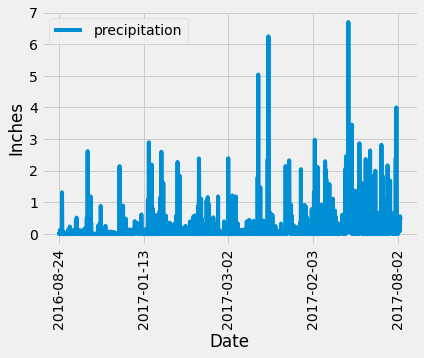

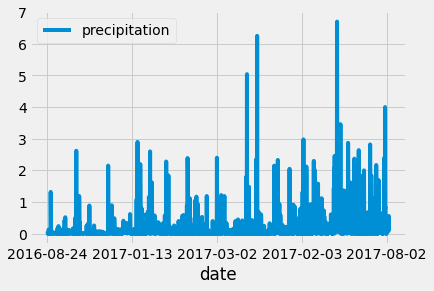

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
dates = dt.datetime.strptime(recdate, '%Y-%m-%d') - dt.timedelta(days=365)
# Calculate the date one year from the last date in data set.
data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= dates).all()
data
# Perform a query to retrieve the data and precipitation scores
df = pd.DataFrame(data,columns=['date','precipitation']).dropna()
df.set_index(df['date'], inplace=True)
df.sort_index()
# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date
ax = df.plot(rot=90)
ax.set_xlabel("Date")
ax.set_ylabel("Inches")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [10]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [11]:
# Design a query to calculate the total number stations in the dataset
statnum = session.query(station.station).count()
statnum

9

In [12]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs = session.query(func.max(measurement.tobs), func.min(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
tobs

[(85.0, 54.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

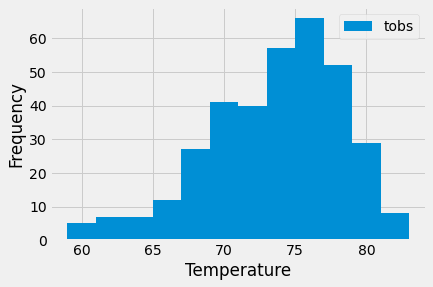

In [14]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
d = session.query(measurement.tobs).filter(measurement.date >= dates).filter(measurement.station == 'USC00519281').all()
df2 = pd.DataFrame(d,columns=['tobs'])
ax = df2.plot(kind='hist',bins=12)
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")

# Close session

In [ ]:
# Close Session
session.close()